<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分類

## 腫瘍の良性・悪性判定タスク

### 特徴量

ここでは画像から数値化できる特徴を特徴量として抽出している

散布図から分類に使えそうな特徴量を見ようとしている

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer=load_breast_cancer()
X=breast_cancer.data #特徴量
y=breast_cancer.target #目的変数
feature_names=breast_cancer.feature_names #特徴量名

In [4]:
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [0]:
X=X[:,:10] #Xのすべての行と10列目までを取り出す

In [0]:
columns = ['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']

In [7]:
from pandas import DataFrame

df = DataFrame(data=X[:, :10], columns=columns)
df['目的変数'] = y

df.tail()  # 下から5行を表示する

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元,目的変数
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,1


In [8]:
df.describe()

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元,目的変数
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


In [9]:
from matplotlib import pyplot
!pip install japanize-matplotlib
import japanize_matplotlib
# pyplot.rcParams['font.family']='IPAGothic'
from pandas.plotting import scatter_matrix

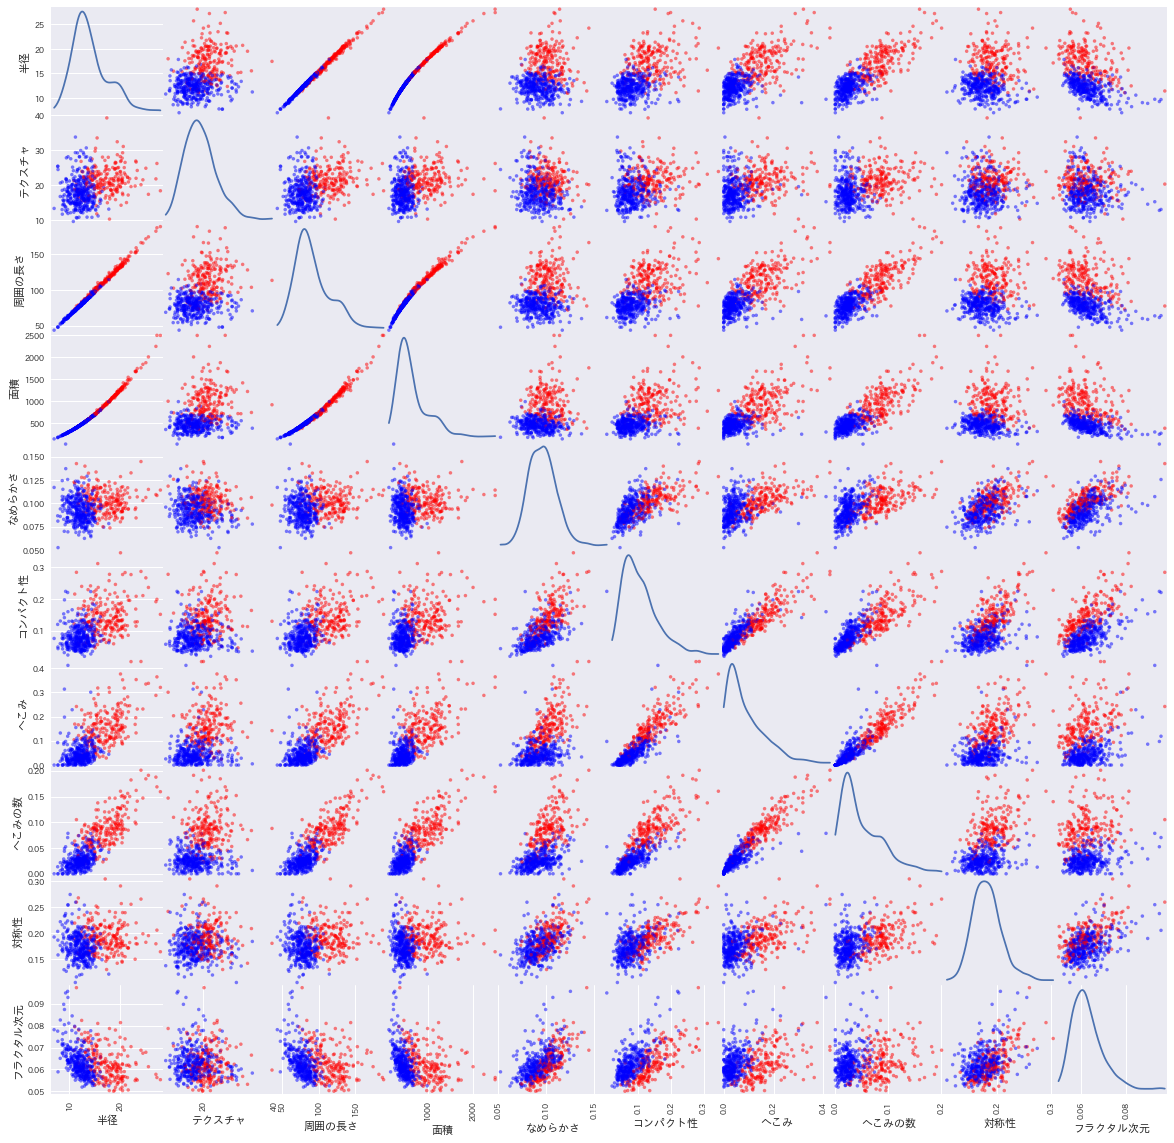

In [10]:
#悪性の腫瘍を赤色、良性の腫瘍を青色にする
colors =['red'if v== 0 else  'blue' for v in y]

#散布図の描画
axes = scatter_matrix(df[columns],figsize=(20,20),diagonal='kde',c=colors)

In [0]:
!pip install japanize-matplotlib
import japanize_matplotlib

日本語フォントはバグってますね。どうやってインストールすればいいのでしょうか2019/01/29
これを書けば大丈夫みたい↑